# JPMorgan: Quantitative Research Job Simulation

## Task 3: Detect Credit Risk

In [3]:
#Load libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, roc_auc_score, roc_curve

In [4]:
#Import data
loans_df = pd.read_csv("Task 3 and 4_Loan_Data.csv")

In [5]:
loans_df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [6]:
loans_df.corr()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
customer_id,1.000000,0.006729,-0.013857,0.003541,-0.008064,-0.008098,0.008044,0.006927
credit_lines_outstanding,0.006729,1.000000,0.080249,0.852210,0.022272,-0.087900,-0.258177,0.862815
loan_amt_outstanding,-0.013857,0.080249,1.000000,0.397403,0.835815,-0.158416,-0.031373,0.098978
total_debt_outstanding,0.003541,0.852210,0.397403,1.000000,0.394397,-0.174353,-0.232246,0.758868
income,-0.008064,0.022272,0.835815,0.394397,1.000000,0.001814,-0.010528,0.016309
years_employed,-0.008098,-0.087900,-0.158416,-0.174353,0.001814,1.000000,0.255873,-0.284506
fico_score,0.008044,-0.258177,-0.031373,-0.232246,-0.010528,0.255873,1.000000,-0.324515
default,0.006927,0.862815,0.098978,0.758868,0.016309,-0.284506,-0.324515,1.000000


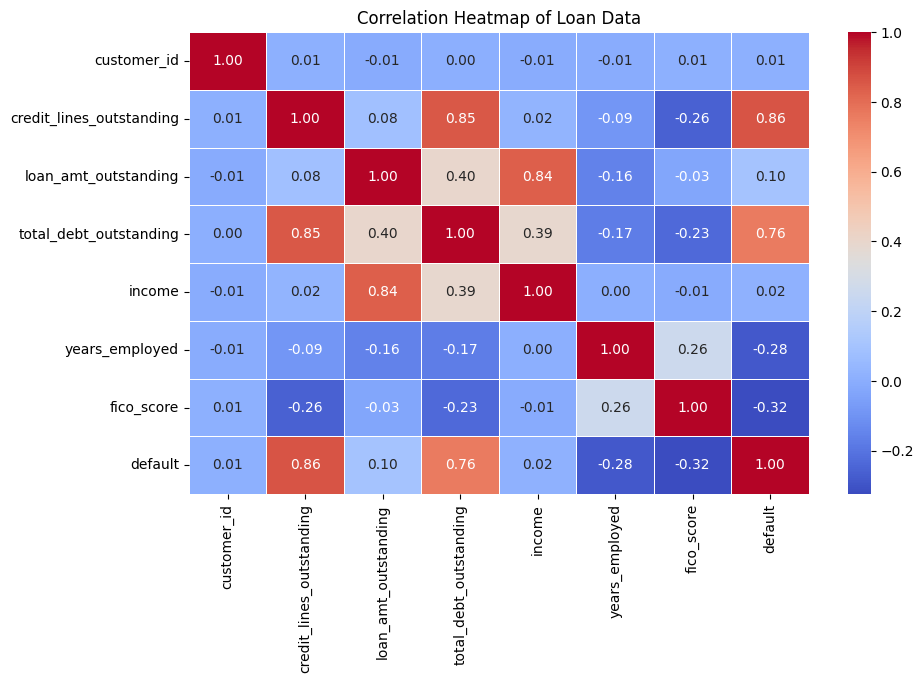

In [7]:
# Compute correlation matrix
corr_matrix = loans_df.corr()

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Show the plot
plt.title("Correlation Heatmap of Loan Data")
plt.show()

In [8]:
X = loans_df.drop(['default'], axis=1)

In [9]:
Y = loans_df['default']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42)

In [11]:
logistic = LogisticRegression(max_iter = 10000).fit(X_train, np.ravel(Y_train))

In [12]:
#Create predictions of probability for loan status using test data
l_preds = logistic.predict_proba(X_test)

In [13]:
#Create and Print dataframes of predictions vs true values 
l_preds_df = pd.DataFrame(l_preds[:,1], columns = ['l_pred'])
true_values_df = Y_test
print(pd.concat([true_values_df.reset_index(drop=True), l_preds_df], axis = 1))

      default        l_pred
0           0  2.314205e-06
1           0  5.662398e-01
2           1  1.000000e+00
3           0  1.402013e-04
4           0  4.620708e-05
...       ...           ...
1995        0  5.890878e-08
1996        0  8.637236e-10
1997        0  2.667752e-05
1998        0  9.295133e-03
1999        0  3.967591e-02

[2000 rows x 2 columns]


In [14]:
l_preds_df.round(decimals = 1).value_counts()


l_pred
0.0       1574
1.0        294
0.1         43
0.2         22
0.9         16
0.5         11
0.3         10
0.7          9
0.4          8
0.6          7
0.8          6
Name: count, dtype: int64

In [15]:
Y_test.value_counts()

default
0    1652
1     348
Name: count, dtype: int64

In [16]:
#With a threshold of 0.5
l_preds_df['l_pred_loan_status_50'] = l_preds_df['l_pred'].apply(lambda x: 1 if x >= 0.50 else 0)

from sklearn.metrics import classification_report
target_names = ['Non-Default', 'Default']
print(classification_report(Y_test, l_preds_df['l_pred_loan_status_50'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.99      0.99      0.99      1652
     Default       0.97      0.95      0.96       348

    accuracy                           0.99      2000
   macro avg       0.98      0.97      0.98      2000
weighted avg       0.99      0.99      0.99      2000



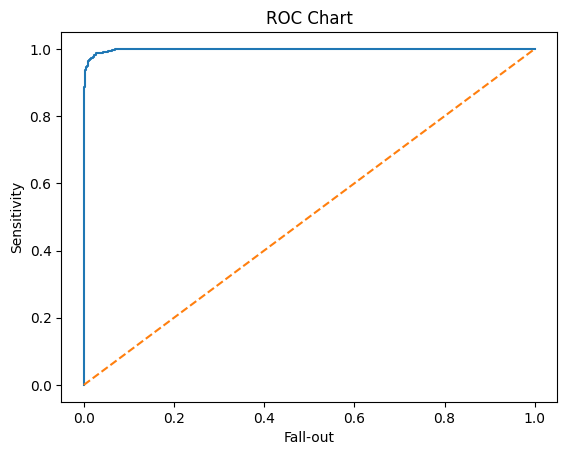

In [17]:
l_prob_default = l_preds[:, 1]
fallout, sensitivity, thresholds= roc_curve(Y_test, l_prob_default)
plt.plot(fallout, sensitivity)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Chart")
plt.xlabel("Fall-out")
plt.ylabel("Sensitivity")
plt.show()

In [18]:
l_preds_df.round(decimals=2)

,l_pred,l_pred_loan_status_50
0,0.00,0
1,0.57,1
2,1.00,1
3,0.00,0
4,0.00,0
...,...,...
1995,0.00,0
1996,0.00,0
1997,0.00,0
1998,0.01,0


In [19]:
loans_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [20]:
loans_df.drop(['default'], axis = 1, inplace =True)

In [21]:
#LogisticRegression on the whole dataset 
proba = logistic.predict_proba(loans_df)
prob_data = pd.DataFrame(proba[:,1].round(decimals=2), columns = ['Proba_To_Default'])
loans_df = pd.concat([loans_df, prob_data], axis = 1)
loans_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,Proba_To_Default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0.00
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,0.99
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0.00
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0.00
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0.00
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0.00
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0.00
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0.01
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0.00


In [22]:
#With a recovery rate of 10%
recovery_rate = 0.1

In [23]:
#Loss Given Default 

In [24]:
loans_df['LGD'] =  loans_df['loan_amt_outstanding']*(1 - recovery_rate) 

In [25]:
loans_df['expected_loss'] = loans_df['Proba_To_Default'] * loans_df['LGD']